# Setup

In [1]:
install_load <- function (package1, ...)  {   

   # convert arguments to vector
   packages <- c(package1, ...)

   # start loop to determine if each package is installed
   for(package in packages){

       # if package is installed locally, load
       if(package %in% rownames(installed.packages()))
          do.call('library', list(package))

       # if package is not installed locally, download, then load
       else {
          install.packages(package)
          do.call("library", list(package))
       }
   } 
}

install_load("mlbench", "mboost", "tidyselect", "parallel", "parallelMap", "randomForestSRC", "mlr", "tidyverse", "FSelector")

also installing the dependencies ‘libcoin’, ‘mvtnorm’, ‘Formula’, ‘inum’, ‘stabs’, ‘nnls’, ‘partykit’





The downloaded binary packages are in
	/var/folders/lj/cbwq_6yd37nb5nsnn6y7vx_80000gp/T//RtmpPCpZzR/downloaded_packages


Loading required package: parallel

Loading required package: stabs

This is mboost 2.9-2. See ‘package?mboost’ and ‘news(package  = "mboost")’
for a complete list of changes.


Warning message:
“package ‘parallelMap’ was built under R version 3.6.2”

 randomForestSRC 2.9.3 
 
 Type rfsrc.news() to see new features, changes, and bug fixes. 
 



Attaching package: ‘randomForestSRC’


The following object is masked from ‘package:stabs’:

    subsample


Loading required package: ParamHelpers

'mlr' is in maintenance mode since July 2019. Future development
efforts will go into its successor 'mlr3' (<https://mlr3.mlr-org.com>).


Attaching package: ‘mlr’


The following objects are masked from ‘package:randomForestSRC’:

    impute, subsample


The following object is masked from ‘package:stabs’:

    subsample


── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.0     ✔ purrr   0.3.4
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ s

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Removed 196 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 196 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 196 rows containing missing values (geom_point).”


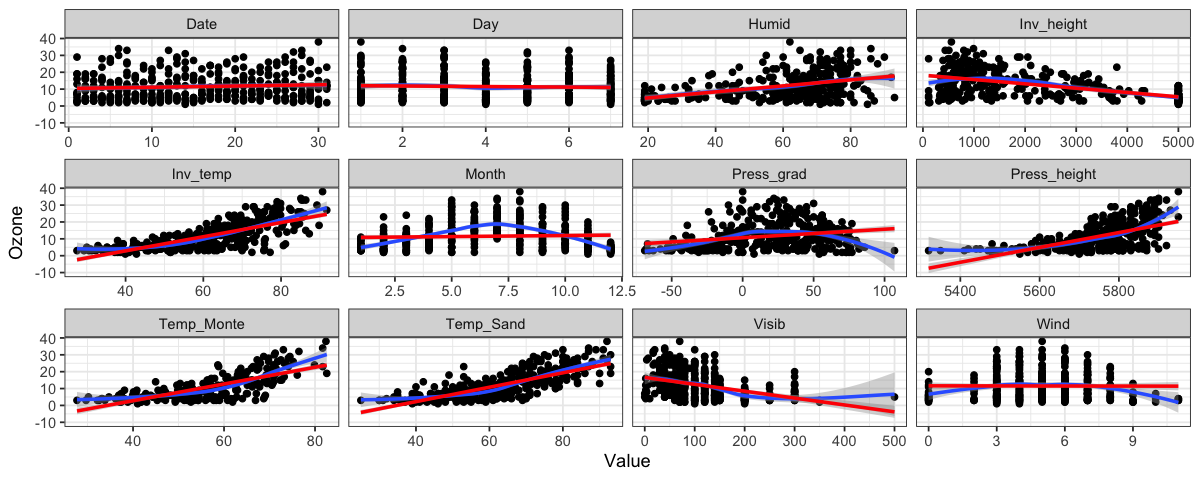

In [2]:
# listing 9.1
data(Ozone, package = "mlbench")

ozoneTib <- as_tibble(Ozone)

names(ozoneTib) <- c("Month", "Date", "Day", "Ozone", "Press_height",
                     "Wind", "Humid", "Temp_Sand", "Temp_Monte",
                     "Inv_height", "Press_grad", "Inv_temp", "Visib")

# listing 9.2
ozoneClean <- mutate_all(ozoneTib, as.numeric) %>%
  filter(is.na(Ozone) == FALSE)

# listing 9.3
options(repr.plot.width=10, repr.plot.height=4)

ozoneUntidy <- gather(ozoneClean, key = "Variable",
                      value = "Value", -Ozone)

ggplot(ozoneUntidy, aes(Value, Ozone)) +
  facet_wrap(~ Variable, scale = "free_x") +
  geom_point() +
  geom_smooth() +
  geom_smooth(method = "lm", col = "red") +
  theme_bw()

# Section 10.3

### Exercise 1

In [3]:
interaction(1:4, c("a", "b", "c", "d"))

[1] 1.a 2.b 3.c 4.d
Levels: 1.a 2.a 3.a 4.a 1.b 2.b 3.b 4.b 1.c 2.c 3.c 4.c 1.d 2.d 3.d 4.d

### Listing 10.1

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



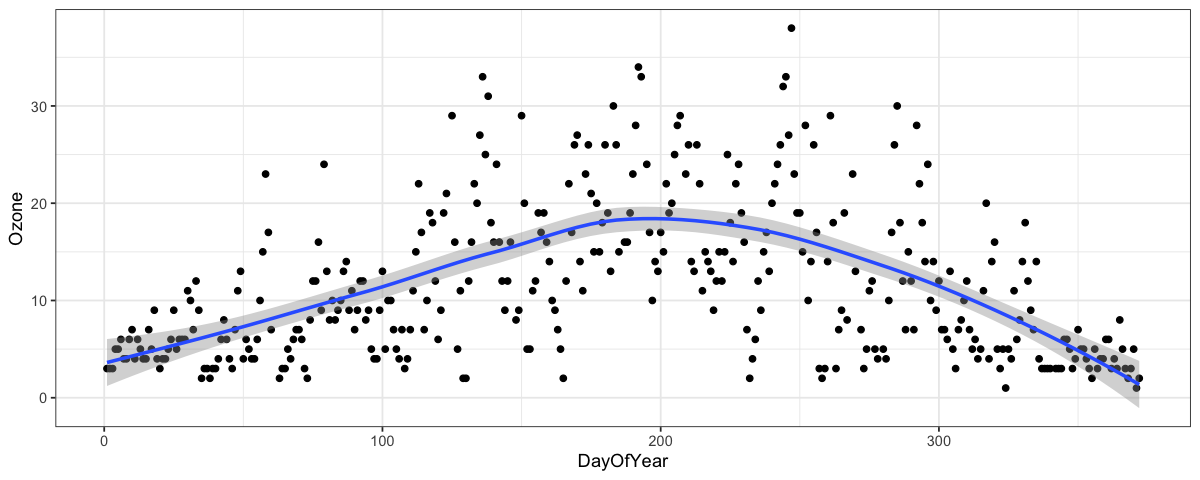

In [4]:
ozoneForGAM <- mutate(ozoneClean, 
                     DayOfYear = as.numeric(interaction(Date, Month))) %>%
    select(c(-"Date", -"Month"))


ggplot(ozoneForGAM, aes(DayOfYear, Ozone)) + 
    geom_point() +
    geom_smooth() +
    theme_bw()

### Exercise 2

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



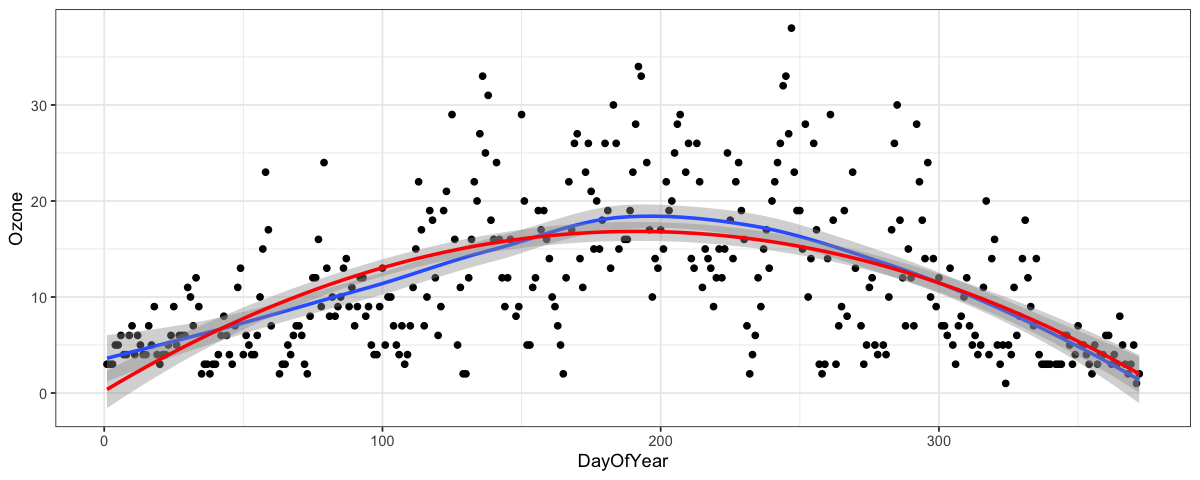

In [5]:
ggplot(ozoneForGAM, aes(DayOfYear, Ozone)) + 
    geom_point() +
    geom_smooth() +
    geom_smooth(method = "lm", formula = "y ~ x + I(x^2)", col = "red") +
    theme_bw()

In [6]:
# y ~ x + I(x^2) seems to fit the data better at the high range but not as well near zero

### Listing 10.2

In [7]:
gamTask <- makeRegrTask(data = ozoneForGAM, target = "Ozone")

imputeMethod <- imputeLearner("regr.rpart")

gamImputeWrapper <- makeImputeWrapper("regr.gamboost", 
                                     classes = list(numeric = imputeMethod))

gamFeatSelControl <- makeFeatSelControlSequential(method = "sfbs")

kFold <- makeResampleDesc("CV", iters = 10)

gamFeatSelWrapper <- makeFeatSelWrapper(learner = gamImputeWrapper, 
                                       resampling = kFold,
                                       control = gamFeatSelControl)

Warning message in makeTask(type = type, data = data, weights = weights, blocking = blocking, :
“Provided data is not a pure data.frame but from class tbl_df, hence it will be converted.”


### Listing 10.3

In [8]:
save.image(file = 'chapter_10.RData')

In [9]:
holdout <- makeResampleDesc("Holdout")

gamCV <- resample(gamFeatSelWrapper, gamTask, resampling = holdout, )

gamCV

Resampling: holdout

Measures:             mse       

[FeatSel] Started selecting features for learner 'regr.gamboost.imputed'

With control class: FeatSelControlSequential

Imputation value: Inf

[FeatSel-x] 1: 11111111111 (11 bits)

Warning message in bsplines(mf[[i]], knots = args$knots[[i]]$knots, boundary.knots = args$knots[[i]]$boundary.knots, :
“Some ‘x’ values are beyond ‘boundary.knots’; Linear extrapolation used.”
Warning message in bsplines(mf[[i]], knots = args$knots[[i]]$knots, boundary.knots = args$knots[[i]]$boundary.knots, :
“Some ‘x’ values are beyond ‘boundary.knots’; Linear extrapolation used.”
Warning message in bsplines(mf[[i]], knots = args$knots[[i]]$knots, boundary.knots = args$knots[[i]]$boundary.knots, :
“Some ‘x’ values are beyond ‘boundary.knots’; Linear extrapolation used.”
Warning message in bsplines(mf[[i]], knots = args$knots[[i]]$knots, boundary.knots = args$knots[[i]]$boundary.knots, :
“Some ‘x’ values are beyond ‘boundary.knots’; Linear extrapolation

Warning message in bsplines(mf[[i]], knots = args$knots[[i]]$knots, boundary.knots = args$knots[[i]]$boundary.knots, :
“Some ‘x’ values are beyond ‘boundary.knots’; Linear extrapolation used.”
Warning message in bsplines(mf[[i]], knots = args$knots[[i]]$knots, boundary.knots = args$knots[[i]]$boundary.knots, :
“Some ‘x’ values are beyond ‘boundary.knots’; Linear extrapolation used.”
[FeatSel-y] 2: mse.test.mean=15.2546011; time: 0.0 min

[FeatSel-x] 2: 11101111111 (10 bits)

Warning message in bsplines(mf[[i]], knots = args$knots[[i]]$knots, boundary.knots = args$knots[[i]]$boundary.knots, :
“Some ‘x’ values are beyond ‘boundary.knots’; Linear extrapolation used.”
Warning message in bsplines(mf[[i]], knots = args$knots[[i]]$knots, boundary.knots = args$knots[[i]]$boundary.knots, :
“Some ‘x’ values are beyond ‘boundary.knots’; Linear extrapolation used.”
Warning message in bsplines(mf[[i]], knots = args$knots[[i]]$knots, boundary.knots = args$knots[[i]]$boundary.knots, :
“Some ‘x’ value

Warning message in bsplines(mf[[i]], knots = args$knots[[i]]$knots, boundary.knots = args$knots[[i]]$boundary.knots, :
“Some ‘x’ values are beyond ‘boundary.knots’; Linear extrapolation used.”
Warning message in bsplines(mf[[i]], knots = args$knots[[i]]$knots, boundary.knots = args$knots[[i]]$boundary.knots, :
“Some ‘x’ values are beyond ‘boundary.knots’; Linear extrapolation used.”
Warning message in bsplines(mf[[i]], knots = args$knots[[i]]$knots, boundary.knots = args$knots[[i]]$boundary.knots, :
“Some ‘x’ values are beyond ‘boundary.knots’; Linear extrapolation used.”
[FeatSel-y] 2: mse.test.mean=15.2700828; time: 0.0 min

[FeatSel-x] 2: 11111110111 (10 bits)

Warning message in bsplines(mf[[i]], knots = args$knots[[i]]$knots, boundary.knots = args$knots[[i]]$boundary.knots, :
“Some ‘x’ values are beyond ‘boundary.knots’; Linear extrapolation used.”
Warning message in bsplines(mf[[i]], knots = args$knots[[i]]$knots, boundary.knots = args$knots[[i]]$boundary.knots, :
“Some ‘x’ value

Warning message in bsplines(mf[[i]], knots = args$knots[[i]]$knots, boundary.knots = args$knots[[i]]$boundary.knots, :
“Some ‘x’ values are beyond ‘boundary.knots’; Linear extrapolation used.”
[FeatSel-y] 2: mse.test.mean=17.1010835; time: 0.0 min

[FeatSel-x] 3: 11111111111 (11 bits)

Warning message in bsplines(mf[[i]], knots = args$knots[[i]]$knots, boundary.knots = args$knots[[i]]$boundary.knots, :
“Some ‘x’ values are beyond ‘boundary.knots’; Linear extrapolation used.”
Warning message in bsplines(mf[[i]], knots = args$knots[[i]]$knots, boundary.knots = args$knots[[i]]$boundary.knots, :
“Some ‘x’ values are beyond ‘boundary.knots’; Linear extrapolation used.”
Warning message in bsplines(mf[[i]], knots = args$knots[[i]]$knots, boundary.knots = args$knots[[i]]$boundary.knots, :
“Some ‘x’ values are beyond ‘boundary.knots’; Linear extrapolation used.”
Warning message in bsplines(mf[[i]], knots = args$knots[[i]]$knots, boundary.knots = args$knots[[i]]$boundary.knots, :
“Some ‘x’ value

[FeatSel-y] 4: mse.test.mean=15.1923603; time: 0.0 min

[FeatSel-x] 4: 11100111111 (9 bits)

Warning message in bsplines(mf[[i]], knots = args$knots[[i]]$knots, boundary.knots = args$knots[[i]]$boundary.knots, :
“Some ‘x’ values are beyond ‘boundary.knots’; Linear extrapolation used.”
Warning message in bsplines(mf[[i]], knots = args$knots[[i]]$knots, boundary.knots = args$knots[[i]]$boundary.knots, :
“Some ‘x’ values are beyond ‘boundary.knots’; Linear extrapolation used.”
Warning message in bsplines(mf[[i]], knots = args$knots[[i]]$knots, boundary.knots = args$knots[[i]]$boundary.knots, :
“Some ‘x’ values are beyond ‘boundary.knots’; Linear extrapolation used.”
Warning message in bsplines(mf[[i]], knots = args$knots[[i]]$knots, boundary.knots = args$knots[[i]]$boundary.knots, :
“Some ‘x’ values are beyond ‘boundary.knots’; Linear extrapolation used.”
Warning message in bsplines(mf[[i]], knots = args$knots[[i]]$knots, boundary.knots = args$knots[[i]]$boundary.knots, :
“Some ‘x’ values

Warning message in bsplines(mf[[i]], knots = args$knots[[i]]$knots, boundary.knots = args$knots[[i]]$boundary.knots, :
“Some ‘x’ values are beyond ‘boundary.knots’; Linear extrapolation used.”
Warning message in bsplines(mf[[i]], knots = args$knots[[i]]$knots, boundary.knots = args$knots[[i]]$boundary.knots, :
“Some ‘x’ values are beyond ‘boundary.knots’; Linear extrapolation used.”
Warning message in bsplines(mf[[i]], knots = args$knots[[i]]$knots, boundary.knots = args$knots[[i]]$boundary.knots, :
“Some ‘x’ values are beyond ‘boundary.knots’; Linear extrapolation used.”
Warning message in bsplines(mf[[i]], knots = args$knots[[i]]$knots, boundary.knots = args$knots[[i]]$boundary.knots, :
“Some ‘x’ values are beyond ‘boundary.knots’; Linear extrapolation used.”
Warning message in bsplines(mf[[i]], knots = args$knots[[i]]$knots, boundary.knots = args$knots[[i]]$boundary.knots, :
“Some ‘x’ values are beyond ‘boundary.knots’; Linear extrapolation used.”
Warning message in bsplines(mf[[i]]

Warning message in bsplines(mf[[i]], knots = args$knots[[i]]$knots, boundary.knots = args$knots[[i]]$boundary.knots, :
“Some ‘x’ values are beyond ‘boundary.knots’; Linear extrapolation used.”
Warning message in bsplines(mf[[i]], knots = args$knots[[i]]$knots, boundary.knots = args$knots[[i]]$boundary.knots, :
“Some ‘x’ values are beyond ‘boundary.knots’; Linear extrapolation used.”
Warning message in bsplines(mf[[i]], knots = args$knots[[i]]$knots, boundary.knots = args$knots[[i]]$boundary.knots, :
“Some ‘x’ values are beyond ‘boundary.knots’; Linear extrapolation used.”
Warning message in bsplines(mf[[i]], knots = args$knots[[i]]$knots, boundary.knots = args$knots[[i]]$boundary.knots, :
“Some ‘x’ values are beyond ‘boundary.knots’; Linear extrapolation used.”
Warning message in bsplines(mf[[i]], knots = args$knots[[i]]$knots, boundary.knots = args$knots[[i]]$boundary.knots, :
“Some ‘x’ values are beyond ‘boundary.knots’; Linear extrapolation used.”
[FeatSel-y] 5: mse.test.mean=15.165

Warning message in bsplines(mf[[i]], knots = args$knots[[i]]$knots, boundary.knots = args$knots[[i]]$boundary.knots, :
“Some ‘x’ values are beyond ‘boundary.knots’; Linear extrapolation used.”
Warning message in bsplines(mf[[i]], knots = args$knots[[i]]$knots, boundary.knots = args$knots[[i]]$boundary.knots, :
“Some ‘x’ values are beyond ‘boundary.knots’; Linear extrapolation used.”
Warning message in bsplines(mf[[i]], knots = args$knots[[i]]$knots, boundary.knots = args$knots[[i]]$boundary.knots, :
“Some ‘x’ values are beyond ‘boundary.knots’; Linear extrapolation used.”
Warning message in bsplines(mf[[i]], knots = args$knots[[i]]$knots, boundary.knots = args$knots[[i]]$boundary.knots, :
“Some ‘x’ values are beyond ‘boundary.knots’; Linear extrapolation used.”
[FeatSel-y] 6: mse.test.mean=16.5819589; time: 0.0 min

[FeatSel-x] 6: 01101101111 (8 bits)

Warning message in bsplines(mf[[i]], knots = args$knots[[i]]$knots, boundary.knots = args$knots[[i]]$boundary.knots, :
“Some ‘x’ values

Warning message in bsplines(mf[[i]], knots = args$knots[[i]]$knots, boundary.knots = args$knots[[i]]$boundary.knots, :
“Some ‘x’ values are beyond ‘boundary.knots’; Linear extrapolation used.”
[FeatSel-y] 6: mse.test.mean=16.3548418; time: 0.0 min

[FeatSel-x] 6: 01101111110 (8 bits)

Warning message in bsplines(mf[[i]], knots = args$knots[[i]]$knots, boundary.knots = args$knots[[i]]$boundary.knots, :
“Some ‘x’ values are beyond ‘boundary.knots’; Linear extrapolation used.”
Warning message in bsplines(mf[[i]], knots = args$knots[[i]]$knots, boundary.knots = args$knots[[i]]$boundary.knots, :
“Some ‘x’ values are beyond ‘boundary.knots’; Linear extrapolation used.”
Warning message in bsplines(mf[[i]], knots = args$knots[[i]]$knots, boundary.knots = args$knots[[i]]$boundary.knots, :
“Some ‘x’ values are beyond ‘boundary.knots’; Linear extrapolation used.”
Warning message in bsplines(mf[[i]], knots = args$knots[[i]]$knots, boundary.knots = args$knots[[i]]$boundary.knots, :
“Some ‘x’ values

Warning message in bsplines(mf[[i]], knots = args$knots[[i]]$knots, boundary.knots = args$knots[[i]]$boundary.knots, :
“Some ‘x’ values are beyond ‘boundary.knots’; Linear extrapolation used.”
Warning message in bsplines(mf[[i]], knots = args$knots[[i]]$knots, boundary.knots = args$knots[[i]]$boundary.knots, :
“Some ‘x’ values are beyond ‘boundary.knots’; Linear extrapolation used.”
Warning message in bsplines(mf[[i]], knots = args$knots[[i]]$knots, boundary.knots = args$knots[[i]]$boundary.knots, :
“Some ‘x’ values are beyond ‘boundary.knots’; Linear extrapolation used.”
Warning message in bsplines(mf[[i]], knots = args$knots[[i]]$knots, boundary.knots = args$knots[[i]]$boundary.knots, :
“Some ‘x’ values are beyond ‘boundary.knots’; Linear extrapolation used.”
Warning message in bsplines(mf[[i]], knots = args$knots[[i]]$knots, boundary.knots = args$knots[[i]]$boundary.knots, :
“Some ‘x’ values are beyond ‘boundary.knots’; Linear extrapolation used.”
Warning message in bsplines(mf[[i]]

Warning message in bsplines(mf[[i]], knots = args$knots[[i]]$knots, boundary.knots = args$knots[[i]]$boundary.knots, :
“Some ‘x’ values are beyond ‘boundary.knots’; Linear extrapolation used.”
Warning message in bsplines(mf[[i]], knots = args$knots[[i]]$knots, boundary.knots = args$knots[[i]]$boundary.knots, :
“Some ‘x’ values are beyond ‘boundary.knots’; Linear extrapolation used.”
Warning message in bsplines(mf[[i]], knots = args$knots[[i]]$knots, boundary.knots = args$knots[[i]]$boundary.knots, :
“Some ‘x’ values are beyond ‘boundary.knots’; Linear extrapolation used.”
Warning message in bsplines(mf[[i]], knots = args$knots[[i]]$knots, boundary.knots = args$knots[[i]]$boundary.knots, :
“Some ‘x’ values are beyond ‘boundary.knots’; Linear extrapolation used.”
Warning message in bsplines(mf[[i]], knots = args$knots[[i]]$knots, boundary.knots = args$knots[[i]]$boundary.knots, :
“Some ‘x’ values are beyond ‘boundary.knots’; Linear extrapolation used.”
Warning message in bsplines(mf[[i]]

Warning message in bsplines(mf[[i]], knots = args$knots[[i]]$knots, boundary.knots = args$knots[[i]]$boundary.knots, :
“Some ‘x’ values are beyond ‘boundary.knots’; Linear extrapolation used.”
Warning message in bsplines(mf[[i]], knots = args$knots[[i]]$knots, boundary.knots = args$knots[[i]]$boundary.knots, :
“Some ‘x’ values are beyond ‘boundary.knots’; Linear extrapolation used.”
[FeatSel-y] 9: mse.test.mean=15.1511003; time: 0.0 min

[FeatSel-x] 9: 00111101111 (8 bits)

Warning message in bsplines(mf[[i]], knots = args$knots[[i]]$knots, boundary.knots = args$knots[[i]]$boundary.knots, :
“Some ‘x’ values are beyond ‘boundary.knots’; Linear extrapolation used.”
Warning message in bsplines(mf[[i]], knots = args$knots[[i]]$knots, boundary.knots = args$knots[[i]]$boundary.knots, :
“Some ‘x’ values are beyond ‘boundary.knots’; Linear extrapolation used.”
Warning message in bsplines(mf[[i]], knots = args$knots[[i]]$knots, boundary.knots = args$knots[[i]]$boundary.knots, :
“Some ‘x’ values

Warning message in bsplines(mf[[i]], knots = args$knots[[i]]$knots, boundary.knots = args$knots[[i]]$boundary.knots, :
“Some ‘x’ values are beyond ‘boundary.knots’; Linear extrapolation used.”
Warning message in bsplines(mf[[i]], knots = args$knots[[i]]$knots, boundary.knots = args$knots[[i]]$boundary.knots, :
“Some ‘x’ values are beyond ‘boundary.knots’; Linear extrapolation used.”
Warning message in bsplines(mf[[i]], knots = args$knots[[i]]$knots, boundary.knots = args$knots[[i]]$boundary.knots, :
“Some ‘x’ values are beyond ‘boundary.knots’; Linear extrapolation used.”
Warning message in bsplines(mf[[i]], knots = args$knots[[i]]$knots, boundary.knots = args$knots[[i]]$boundary.knots, :
“Some ‘x’ values are beyond ‘boundary.knots’; Linear extrapolation used.”
Warning message in bsplines(mf[[i]], knots = args$knots[[i]]$knots, boundary.knots = args$knots[[i]]$boundary.knots, :
“Some ‘x’ values are beyond ‘boundary.knots’; Linear extrapolation used.”
Warning message in bsplines(mf[[i]]

[FeatSel-y] 10: mse.test.mean=17.4524895; time: 0.0 min

[FeatSel-x] 11: 10100101111 (7 bits)

Warning message in bsplines(mf[[i]], knots = args$knots[[i]]$knots, boundary.knots = args$knots[[i]]$boundary.knots, :
“Some ‘x’ values are beyond ‘boundary.knots’; Linear extrapolation used.”
Warning message in bsplines(mf[[i]], knots = args$knots[[i]]$knots, boundary.knots = args$knots[[i]]$boundary.knots, :
“Some ‘x’ values are beyond ‘boundary.knots’; Linear extrapolation used.”
Warning message in bsplines(mf[[i]], knots = args$knots[[i]]$knots, boundary.knots = args$knots[[i]]$boundary.knots, :
“Some ‘x’ values are beyond ‘boundary.knots’; Linear extrapolation used.”
Warning message in bsplines(mf[[i]], knots = args$knots[[i]]$knots, boundary.knots = args$knots[[i]]$boundary.knots, :
“Some ‘x’ values are beyond ‘boundary.knots’; Linear extrapolation used.”
Warning message in bsplines(mf[[i]], knots = args$knots[[i]]$knots, boundary.knots = args$knots[[i]]$boundary.knots, :
“Some ‘x’ valu

Warning message in bsplines(mf[[i]], knots = args$knots[[i]]$knots, boundary.knots = args$knots[[i]]$boundary.knots, :
“Some ‘x’ values are beyond ‘boundary.knots’; Linear extrapolation used.”
Warning message in bsplines(mf[[i]], knots = args$knots[[i]]$knots, boundary.knots = args$knots[[i]]$boundary.knots, :
“Some ‘x’ values are beyond ‘boundary.knots’; Linear extrapolation used.”
Warning message in bsplines(mf[[i]], knots = args$knots[[i]]$knots, boundary.knots = args$knots[[i]]$boundary.knots, :
“Some ‘x’ values are beyond ‘boundary.knots’; Linear extrapolation used.”
[FeatSel-y] 11: mse.test.mean=15.1992162; time: 0.0 min

[FeatSel-x] 12: 00000101111 (5 bits)

Warning message in bsplines(mf[[i]], knots = args$knots[[i]]$knots, boundary.knots = args$knots[[i]]$boundary.knots, :
“Some ‘x’ values are beyond ‘boundary.knots’; Linear extrapolation used.”
Warning message in bsplines(mf[[i]], knots = args$knots[[i]]$knots, boundary.knots = args$knots[[i]]$boundary.knots, :
“Some ‘x’ valu

Warning message in bsplines(mf[[i]], knots = args$knots[[i]]$knots, boundary.knots = args$knots[[i]]$boundary.knots, :
“Some ‘x’ values are beyond ‘boundary.knots’; Linear extrapolation used.”
Warning message in bsplines(mf[[i]], knots = args$knots[[i]]$knots, boundary.knots = args$knots[[i]]$boundary.knots, :
“Some ‘x’ values are beyond ‘boundary.knots’; Linear extrapolation used.”
Warning message in bsplines(mf[[i]], knots = args$knots[[i]]$knots, boundary.knots = args$knots[[i]]$boundary.knots, :
“Some ‘x’ values are beyond ‘boundary.knots’; Linear extrapolation used.”
[FeatSel-y] 12: mse.test.mean=18.2500530; time: 0.0 min

[FeatSel-x] 13: 10100101111 (7 bits)

Warning message in bsplines(mf[[i]], knots = args$knots[[i]]$knots, boundary.knots = args$knots[[i]]$boundary.knots, :
“Some ‘x’ values are beyond ‘boundary.knots’; Linear extrapolation used.”
Warning message in bsplines(mf[[i]], knots = args$knots[[i]]$knots, boundary.knots = args$knots[[i]]$boundary.knots, :
“Some ‘x’ valu

Warning message in bsplines(mf[[i]], knots = args$knots[[i]]$knots, boundary.knots = args$knots[[i]]$boundary.knots, :
“Some ‘x’ values are beyond ‘boundary.knots’; Linear extrapolation used.”
Warning message in bsplines(mf[[i]], knots = args$knots[[i]]$knots, boundary.knots = args$knots[[i]]$boundary.knots, :
“Some ‘x’ values are beyond ‘boundary.knots’; Linear extrapolation used.”
Warning message in bsplines(mf[[i]], knots = args$knots[[i]]$knots, boundary.knots = args$knots[[i]]$boundary.knots, :
“Some ‘x’ values are beyond ‘boundary.knots’; Linear extrapolation used.”
Warning message in bsplines(mf[[i]], knots = args$knots[[i]]$knots, boundary.knots = args$knots[[i]]$boundary.knots, :
“Some ‘x’ values are beyond ‘boundary.knots’; Linear extrapolation used.”
Warning message in bsplines(mf[[i]], knots = args$knots[[i]]$knots, boundary.knots = args$knots[[i]]$boundary.knots, :
“Some ‘x’ values are beyond ‘boundary.knots’; Linear extrapolation used.”
Warning message in bsplines(mf[[i]]

Resample Result
Task: ozoneForGAM
Learner: regr.gamboost.imputed.featsel
Aggr perf: mse.test.mean=16.4834733
Runtime: 113.542

### Listing 10.4

In [10]:
save.image(file = 'chapter_10.RData')

In [11]:
# takes longer than 8 hours on 2 cores
if (TRUE) {
    parallelStartSocket(cpus = detectCores())
    
    gamModel <- train(gamFeatSelWrapper, gamTask)
    
    parallelStop()
    
    gamModelData <- getLearnerModel(gamModel, more.unwrap = TRUE)    
}

Starting parallelization in mode=socket with cpus=8.

[FeatSel] Started selecting features for learner 'regr.gamboost.imputed'

With control class: FeatSelControlSequential

Imputation value: Inf

[FeatSel-x] 1: 11111111111 (11 bits)

Exporting objects to slaves for mode socket: .mlr.slave.options

Mapping in parallel: mode = socket; level = mlr.resample; cpus = 8; elements = 10.

[FeatSel-y] 1: mse.test.mean=15.5255156; time: 0.1 min

Exporting objects to slaves for mode socket: .mlr.slave.options

Mapping in parallel: mode = socket; level = mlr.selectFeatures; cpus = 8; elements = 11.

Exporting objects to slaves for mode socket: .mlr.slave.options

Mapping in parallel: mode = socket; level = mlr.selectFeatures; cpus = 8; elements = 1.

Exporting objects to slaves for mode socket: .mlr.slave.options

Mapping in parallel: mode = socket; level = mlr.selectFeatures; cpus = 8; elements = 10.

Exporting objects to slaves for mode socket: .mlr.slave.options

Mapping in parallel: mode = soc

### Listing 10.5

In [13]:
save.image(file = 'chapter_10.RData')

ERROR: Error in plot(gamModel$fitted(), resid(gamModelData)): attempt to apply non-function


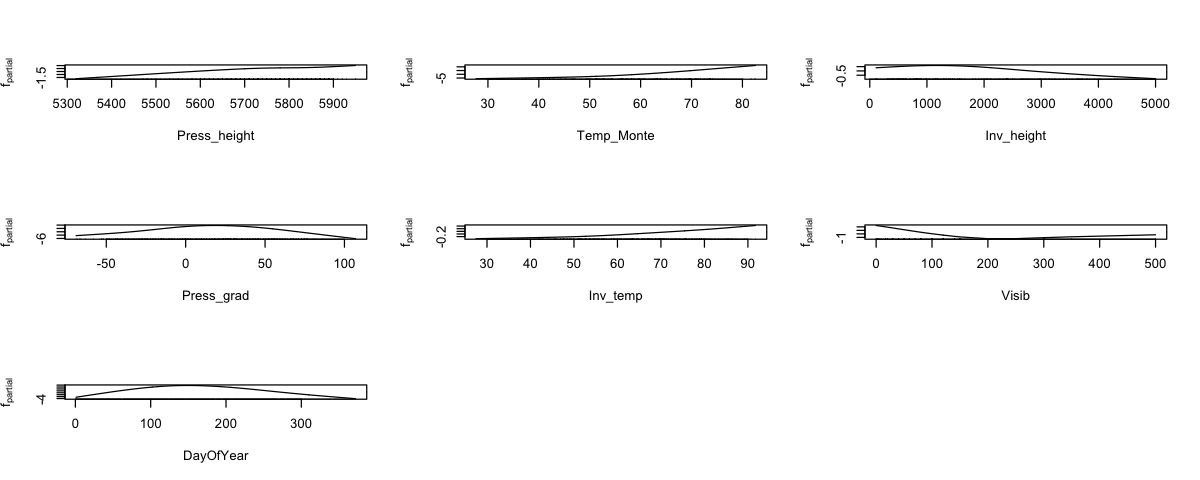

In [12]:
if (exists("gamModelData") && !is.null(gamModelData)) {
    par(mfrow = c(3,3))
    
    plot(gamModelData, type = "l")
    
    plot(gamModel$fitted(), resid(gamModelData))
    
    qqnorm(resid(gamModelData))
    
    qqline(resid(gamModelData))
    
    par(mfrow = c(1, 1))    
}

## Section 10.4

### Exercise 3